### Autoencoder para Remoção de Ruído e Restauração de Imagem (Denoising Autoencoder)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def build_denoising_autoencoder(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded_img = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded_img)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder


In [2]:
# Exemplo de adição de ruído gaussiano
def add_noise(imgs):
    noise_factor = 0.4
    noisy_imgs = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape)
    return np.clip(noisy_imgs, 0., 1.)

# Dados de exemplo (CIFAR-10)
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0229 - val_loss: 0.0111
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 12/50
391/391 ━━━━━━━━━━

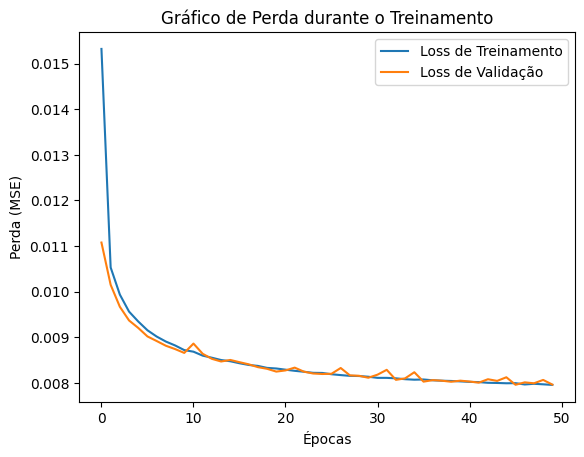

In [3]:
import matplotlib.pyplot as plt

autoencoder = build_denoising_autoencoder((32, 32, 3))
history = autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_data=(x_test_noisy, x_test))

# Gerando o gráfico de perda
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Gráfico de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


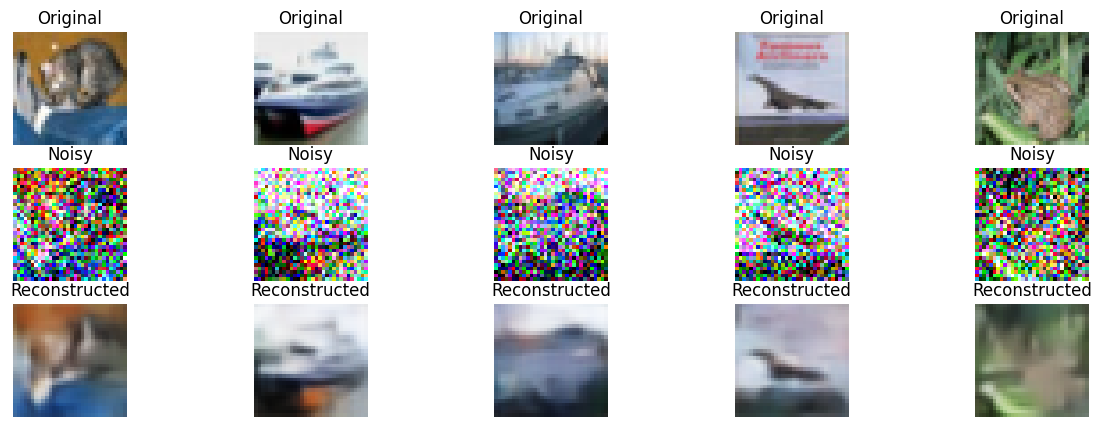

In [4]:
import numpy as np

# Seleciona algumas imagens de teste
num_images_to_show = 5
test_samples = x_test[:num_images_to_show]
test_samples_noisy = x_test_noisy[:num_images_to_show]

# Reconstruir as imagens usando o modelo treinado
reconstructed_imgs = autoencoder.predict(test_samples_noisy)

# Exibir resultados
def show_images(original, noisy, reconstructed, num_images=5):
    plt.figure(figsize=(15, 5))
    
    for i in range(num_images):
        # Imagem Original
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis('off')

        # Imagem com Ruído
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(noisy[i])
        plt.title("Noisy")
        plt.axis('off')

        # Imagem Reconstruída
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis('off')
    
    plt.show()

# Chamar a função para exibir as imagens
show_images(test_samples, test_samples_noisy, reconstructed_imgs, num_images=num_images_to_show)


In [5]:
import tensorflow as tf
import os

# Caminhos do dataset
train_dir = "C:\\Users\\anton\\OneDrive\\Documentos\\ML_Deep\\Div2K\\DIV2K_train_HR\\DIV2K_train_HR"
val_dir = "C:\\Users\\anton\\OneDrive\\Documentos\\ML_Deep\\Div2K\\DIV2K_valid_HR\\DIV2K_valid_HR"

# Parâmetros
img_size = (256, 256)  # Ajuste o tamanho da imagem conforme necessário
batch_size = 32  # Ajuste o batch size conforme sua GPU/CPU

# Função para carregar dataset de treinamento
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode=None,  # Não precisamos de rótulos para um autoencoder
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Função para carregar dataset de validação
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode=None,  # Não precisamos de rótulos para um autoencoder
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Normalizando as imagens para o intervalo [0, 1]
train_dataset = train_dataset.map(lambda x: x / 255.0)
val_dataset = val_dataset.map(lambda x: x / 255.0)


Found 800 files.
Found 100 files.


In [6]:
import numpy as np

# Função para adicionar ruído gaussiano
def add_noise(imgs, noise_factor=0.4):
    noisy_imgs = imgs + noise_factor * tf.random.normal(shape=tf.shape(imgs))
    return tf.clip_by_value(noisy_imgs, 0., 1.)

# Adicionar ruído ao dataset de treinamento
train_noisy_dataset = train_dataset.map(lambda x: (add_noise(x), x))

# Adicionar ruído ao dataset de validação
val_noisy_dataset = val_dataset.map(lambda x: (add_noise(x), x))


In [1]:
import tensorflow as tf

# Lista todas as GPUs disponíveis
gpus = tf.config.list_physical_devices('GPU')
print("GPUs disponíveis:", gpus)

if gpus:
    print(f"Treinamento está sendo feito na GPU: {gpus[0].name}")
else:
    print("Nenhuma GPU detectada. O treinamento será feito na CPU.")


GPUs disponíveis: []
Nenhuma GPU detectada. O treinamento será feito na CPU.


In [1]:
import tensorflow as tf

print("CUDA está disponível:", tf.test.is_built_with_cuda())
print("GPU está disponível:", len(tf.config.list_physical_devices('GPU')) > 0)


CUDA está disponível: False
GPU está disponível: False


In [7]:
from tensorflow.keras import layers, models, optimizers

# Definir a arquitetura do autoencoder
def build_denoising_autoencoder(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    decoded_img = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded_img)
    autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='mse')
    
    return autoencoder

# Instanciar o modelo
autoencoder = build_denoising_autoencoder((256, 256, 3))  # Usando a resolução definida

# Treinar o modelo
history = autoencoder.fit(train_noisy_dataset, epochs=100, validation_data=val_noisy_dataset)


Epoch 1/100
 3/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 0.0883

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Plotando o gráfico de perda
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Gráfico de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()
